In [20]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import optimize

%matplotlib inline

In [21]:
# Ejemplo de optimización con restricciones scipy

# defino una funcion de ayuda para subregion en el gráfico
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

In [22]:
# función a minimizar
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

In [23]:
# minimizo la función sin restricciones
x_opt = optimize.minimize(f, (1, 1), method='BFGS').x

In [24]:
# el mínimo para las restricciones
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, np.array([1, 1]), method='L-BFGS-B',bounds=[bnd_x1, bnd_x2]).x

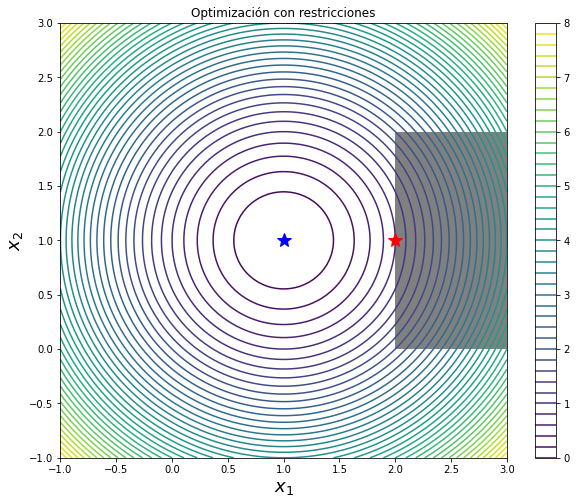

In [25]:
# graficando la solución
fig, ax = plt.subplots(figsize=(10, 8))

# create a point mesh to paint the objetive function
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)

# paint the objetive function contour and optimization points
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

# paint the restriction
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],facecolor="grey")
ax.add_patch(bound_rect)

# set axis
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

# set color bar and title
plt.colorbar(c, ax=ax)
ax.set_title('Optimización con restricciones')

# show result
plt.show()